In [2]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from os import listdir
from datetime import datetime
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

## MODIS vs MAIAC 

In [6]:
#### Comparativa por buffer


def linear_regression_plot (path, date_format,nrows,ncols, plot, resolucion_espaciotemporal,color_maiac_61,color_maiac_60,edge_color_maiac_60,edge_color_maiac_61):
    '''
    The function allows plotting the linear regression of each AERONET station.
    In addition, the main statistics and the linear regression equation are shown.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each  for stations MAIAC-MODIS For example: 
    color_modis = ["#74c476","#fed976","#fb6a4a", "#74a9cf","#df65b0","#807dba"]
    color_maiac = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
    '''
    i=0 
    j=0 


    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,8),dpi=500)
    fig.suptitle(resolucion_espaciotemporal, fontsize=16, fontweight='bold')
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        print(p)
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        station_name = files [2:4]
#data = pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/V02/processed/merge_BUFFER/Latam_C61/3_BA-1km-MAIAC-AER_MEAN-TotBuff_c61.csv")
#print(data.columns)
        #date_format='%Y-%m-%d'
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        data_mean_period_len =len(data.dropna(how='all'))
        # Station Name
        ########################                VARIABLES                ########################
        #########################     DF_60 MODIS         DF_61 MAIAC
        #Separates dataframe for na values
        df_60 = data[['date', 'AOD_modis', 'AOD_550_AER_mean']]
        y_maiac_60= df_60["AOD_modis"]
        x_aer_60 = df_60['AOD_550_AER_mean']
        ##
        df_61 = data[['date', 'AOD_maiac_61', 'AOD_550_AER_mean']]
        y_maiac_61= df_61["AOD_maiac_61"]
        x_aer_61 = df_61['AOD_550_AER_mean']
        #Mask for every dataset
        ##60
        mask_60 = ~np.isnan(x_aer_60) & ~np.isnan(y_maiac_60)
        x_aer_60 = x_aer_60[mask_60]
        y_maiac_60 = y_maiac_60[mask_60]

        ##61
        mask_61 = ~np.isnan(x_aer_61) & ~np.isnan(y_maiac_61)
        x_aer_61 = x_aer_61[mask_61]
        y_maiac_61 = y_maiac_61[mask_61]
        
       
        # #numero de datos sin contar los NaNs
        n_60 = len(x_aer_60)
        n_61 = len(x_aer_61)
        #e, la ordenada al origen y el R2
        slope_maiac_60 , intercept_maiac_60 , r_maiac_60 , p_maiac_60 , stderr_maiac_60  = scipy.stats.linregress(x_aer_60 , y_maiac_60)
        slope_maiac_61 , intercept_maiac_61 , r_maiac_61 , p_maiac_61 , stderr_maiac_61  = scipy.stats.linregress(x_aer_61 , y_maiac_61)
               
        # R2
        R2_maiac_60 =r_maiac_60*r_maiac_60
        R2_maiac_61 =r_maiac_61*r_maiac_61


        #Calculo RMSE
        RMSE_maiac_60= mean_squared_error(y_maiac_60, x_aer_60, squared = False)
        RMSE_maiac_61 = mean_squared_error(y_maiac_61, x_aer_61, squared = False)

        
        RMSE_maiac_normalize_60 = round(RMSE_maiac_60/(x_aer_60.mean()),3)
        RMSE_maiac_normalize_61 = round(RMSE_maiac_61/(x_aer_61.mean()),3)



        #Bias
        bias_maiac_60 = round(( sum(y_maiac_60 - x_aer_60)/n_60),3)
        bias_maiac_61 = round(( sum(y_maiac_61 - x_aer_61)/n_61),3)

        

        ########################                PREDICT                ########################
        
        # #y_maiac_p= data["AOD_550_maiac_mean"].values.reshape(-1,1)
        y_maiac_p_60 = y_maiac_60.values.reshape(-1,1)
        x_p_60 = x_aer_60.values.reshape(-1,1)
        ##
        y_maiac_p_61= y_maiac_61.values.reshape(-1,1)
        x_p_61 = x_aer_61.values.reshape(-1,1)


        ######
        linear_regresion_maiac_60 = LinearRegression()
        linear_regresion_maiac_60.fit(x_p_60,y_maiac_p_60)
        li_predict_maiac_60= linear_regresion_maiac_60.predict(x_p_60)
        ##
        linear_regresion_maiac_61 = LinearRegression()
        linear_regresion_maiac_61.fit(x_p_61,y_maiac_p_61)
        li_predict_maiac_61 = linear_regresion_maiac_61.predict(x_p_61)
        ##


        #### 
        #fig.suptitle(resolucion_espaciotemporal, fontsize=16, fontweight='bold')
         ########################                PLOT                ########################
                # Figure
                #Scatter plot Unit vs Ref

        
        ax[i][j].plot(x_p_60,li_predict_maiac_60,c=color_maiac_60[p],linestyle="-",linewidth=2.5)#azul
        ax[i][j].plot(x_p_61,li_predict_maiac_61,c=color_maiac_61[p],linestyle="-",linewidth=2.5)#verde
        ax[i][j].scatter(x_p_60, y_maiac_p_60,  c=color_maiac_60[p],edgecolors=edge_color_maiac_60[p] ,alpha=0.5,  s=25,label="MODIS")
        #
        ax[i][j].scatter(x_p_60, y_maiac_p_61,  c=color_maiac_61[p] ,edgecolors=edge_color_maiac_61[p] ,alpha=0.5,  s=25,label="MAIAC")

        ax[i][j].set_xlim(0, 2.2)
        ax[i][j].set_ylim(0, 2.2)
        ax[i][j].yaxis.set_ticks(np.arange(0.2, 2.25, 0.4))
        ax[i][j].xaxis.set_ticks(np.arange(0.2, 2.25, 0.4))
       
        ax[i][j].text(0.03, 1.95, "MODIS =" , fontsize=14, ha="left", va="bottom", fontweight = "bold")
        ax[i][j].text(0.03, 1.80, "MAIAC =", fontsize=14, ha="left", va="bottom",fontweight = "bold")
        ax[i][j].text(0.56, 1.95, (str(round (intercept_maiac_60,2)) + " + "+ str(round (slope_maiac_60,2)) + " AOD") , fontsize=14, ha="left", va="bottom")#, bbox=dict(boxstyle="round", fc=(1.0, 0.99, 0.99)))
        ax[i][j].text(0.56, 1.80, (str(round (intercept_maiac_61,2)) + " + "+ str(round (slope_maiac_61,2))+ " AOD") , fontsize=14, ha="left", va="bottom")#, bbox=dict(boxstyle="round", fc=(1.0, 0.99, 0.99)))
                # Statistics by station
        ax[i][j].text(1.45, 0.68, "MODIS" , fontsize=13, ha="center", va="bottom", fontweight = "bold")
        ax[i][j].text(1.90, 0.68, "MAIAC" , fontsize=13, ha="center", va="bottom",fontweight = "bold")
        ax[i][j].text(0.95, 0.55, r'$R^{2}$ ', fontsize=14, ha="left", va="center")
        ax[i][j].text(0.95, 0.40, r'$RMSE$ ',fontsize=14,ha="left", va="center")
        ax[i][j].text(0.95, 0.25, r'$Bias$', fontsize=14,ha="left", va="center")
        ax[i][j].text(1.03, 0.1, r'$n$    ', fontsize=14,ha="left", va="center")

        #Statistics by station for MODIS
        ax[i][j].text(1.35, 0.55,(round(R2_maiac_60,2)) , fontsize=14, ha="left", va="center")
        ax[i][j].text(1.35, 0.40,  (round(RMSE_maiac_60,2)) , fontsize=14,ha="left", va="center")
        ax[i][j].text(1.35, 0.25, (round(bias_maiac_60,2)) , fontsize=14,ha="left", va="center")#,
        ax[i][j].text(1.35, 0.1, n_60 , fontsize=14,ha="left", va="center")

        # Statistics by station for  MAIAC
        ax[i][j].text(1.80, 0.55,(round(R2_maiac_61,2)) , fontsize=14, ha="left", va="center")
        ax[i][j].text(1.80, 0.40,   (round(RMSE_maiac_61,2)) , fontsize=14,ha="left", va="center")
        ax[i][j].text(1.80, 0.25,  (round(bias_maiac_61,2)), fontsize=14,ha="left", va="center")#,
        ax[i][j].text(1.80, 0.1,  n_61 , fontsize=14,ha="left", va="center")
        
        #Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=17,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 20})
         # Tittle legend
       # tittle_legend = ["MODIS","MAIAC"]
        #ax[i][j].legend(frameon = False, markerfirst = False, fontsize = 10,loc='upper right')
        # Axes names
        ax[0][0].set_xlabel(r'',size=12)
        ax[0][1].set_xlabel(r'',size=12)
        ax[0][2].set_xlabel(r'',size=12)
        ax[1][0].set_xlabel(r'$AOD_{AERONET}$',size=17)
        ax[1][1].set_xlabel(r'$AOD_{AERONET}$',size=17)
        ax[1][2].set_xlabel(r'$AOD_{AERONET}$',size=17)
        
        
        ax[0][0].set_ylabel(r'$AOD_{Satelital}$',size=17)
        ax[0][1].set_ylabel(r'',size=17)
        ax[0][2].set_ylabel(r'',size=17)
        ax[1][0].set_ylabel(r'$AOD_{Satelital}$',size=17)
        ax[1][1].set_ylabel(r'',size=17)
        ax[1][2].set_ylabel(r'',size=17)
        
            
        


        
        plt.subplots_adjust(left=0.01,#0.125,
                    bottom=0.01,#0.1, 
                    right=0.99,#0.9, 
                    top=0.99,#0.9, 
                    wspace=0.2, 
                    hspace=0.25)#0.4)
        #ax[i][j].legend(frameon = True, markerfirst = True, fontsize = 13,loc='upper right')
        ax[i][j].legend(frameon=True, 
              markerfirst=True, 
              fontsize=13, 
              loc='upper right', 
              borderpad=0.2,  # Reduce el tamaño del recuadro
              borderaxespad=0.22)  # Ajusta el espacio entre la leyenda y el gráfico
        #ax[i][j].legend(bbox_to_anchor=(0.85, 1.03), loc='upper right', frameon=True, markerfirst=False, fontsize=10)

        print(f'{station_name} ==> MODIS =  {round(R2_maiac_60,3)}, R MAIAC =  {round(R2_maiac_61,3)}')
                #Linea 1:1:
        x_linea11 = np.linspace(0, 2,10)  # Genera 100 puntos entre 0 y 10
        y_linea11 = x_linea11
        ax[i][j].plot(x_linea11,y_linea11,c="#636363",linestyle="--",linewidth=1.3)#azul
#         ax[0][0].text(1.15, 0.55,("0.85") , fontsize=14, ha="left", va="center")
#         ax[1][0].text(1.50, 0.55,("0.50") , fontsize=14, ha="left", va="center")
#         ax[1][0].text(1.15, 0.40,  ("0.10") , fontsize=14,ha="left", va="center")
#         ax[1][1].text(1.15, 0.40,  ("0.10") , fontsize=14,ha="left", va="center")
        ax[i][j].tick_params(axis='both', which='major', labelsize=13)  


        # Location of data in each subplot
        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
   # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("D:/Josefina/Congresos/EGU_2024/plots_02/linear_regression_plot_EU.jpg", dpi=500))
    else:
        return(plt.show())

0
SP ==> MODIS =  0.82, R MAIAC =  0.807
1
ST ==> MODIS =  0.429, R MAIAC =  0.713
2
BA ==> MODIS =  0.215, R MAIAC =  0.365
3
MD ==> MODIS =  0.562, R MAIAC =  0.509
4
LP ==> MODIS =  0.217, R MAIAC =  0.232
5
MX ==> MODIS =  0.649, R MAIAC =  0.618


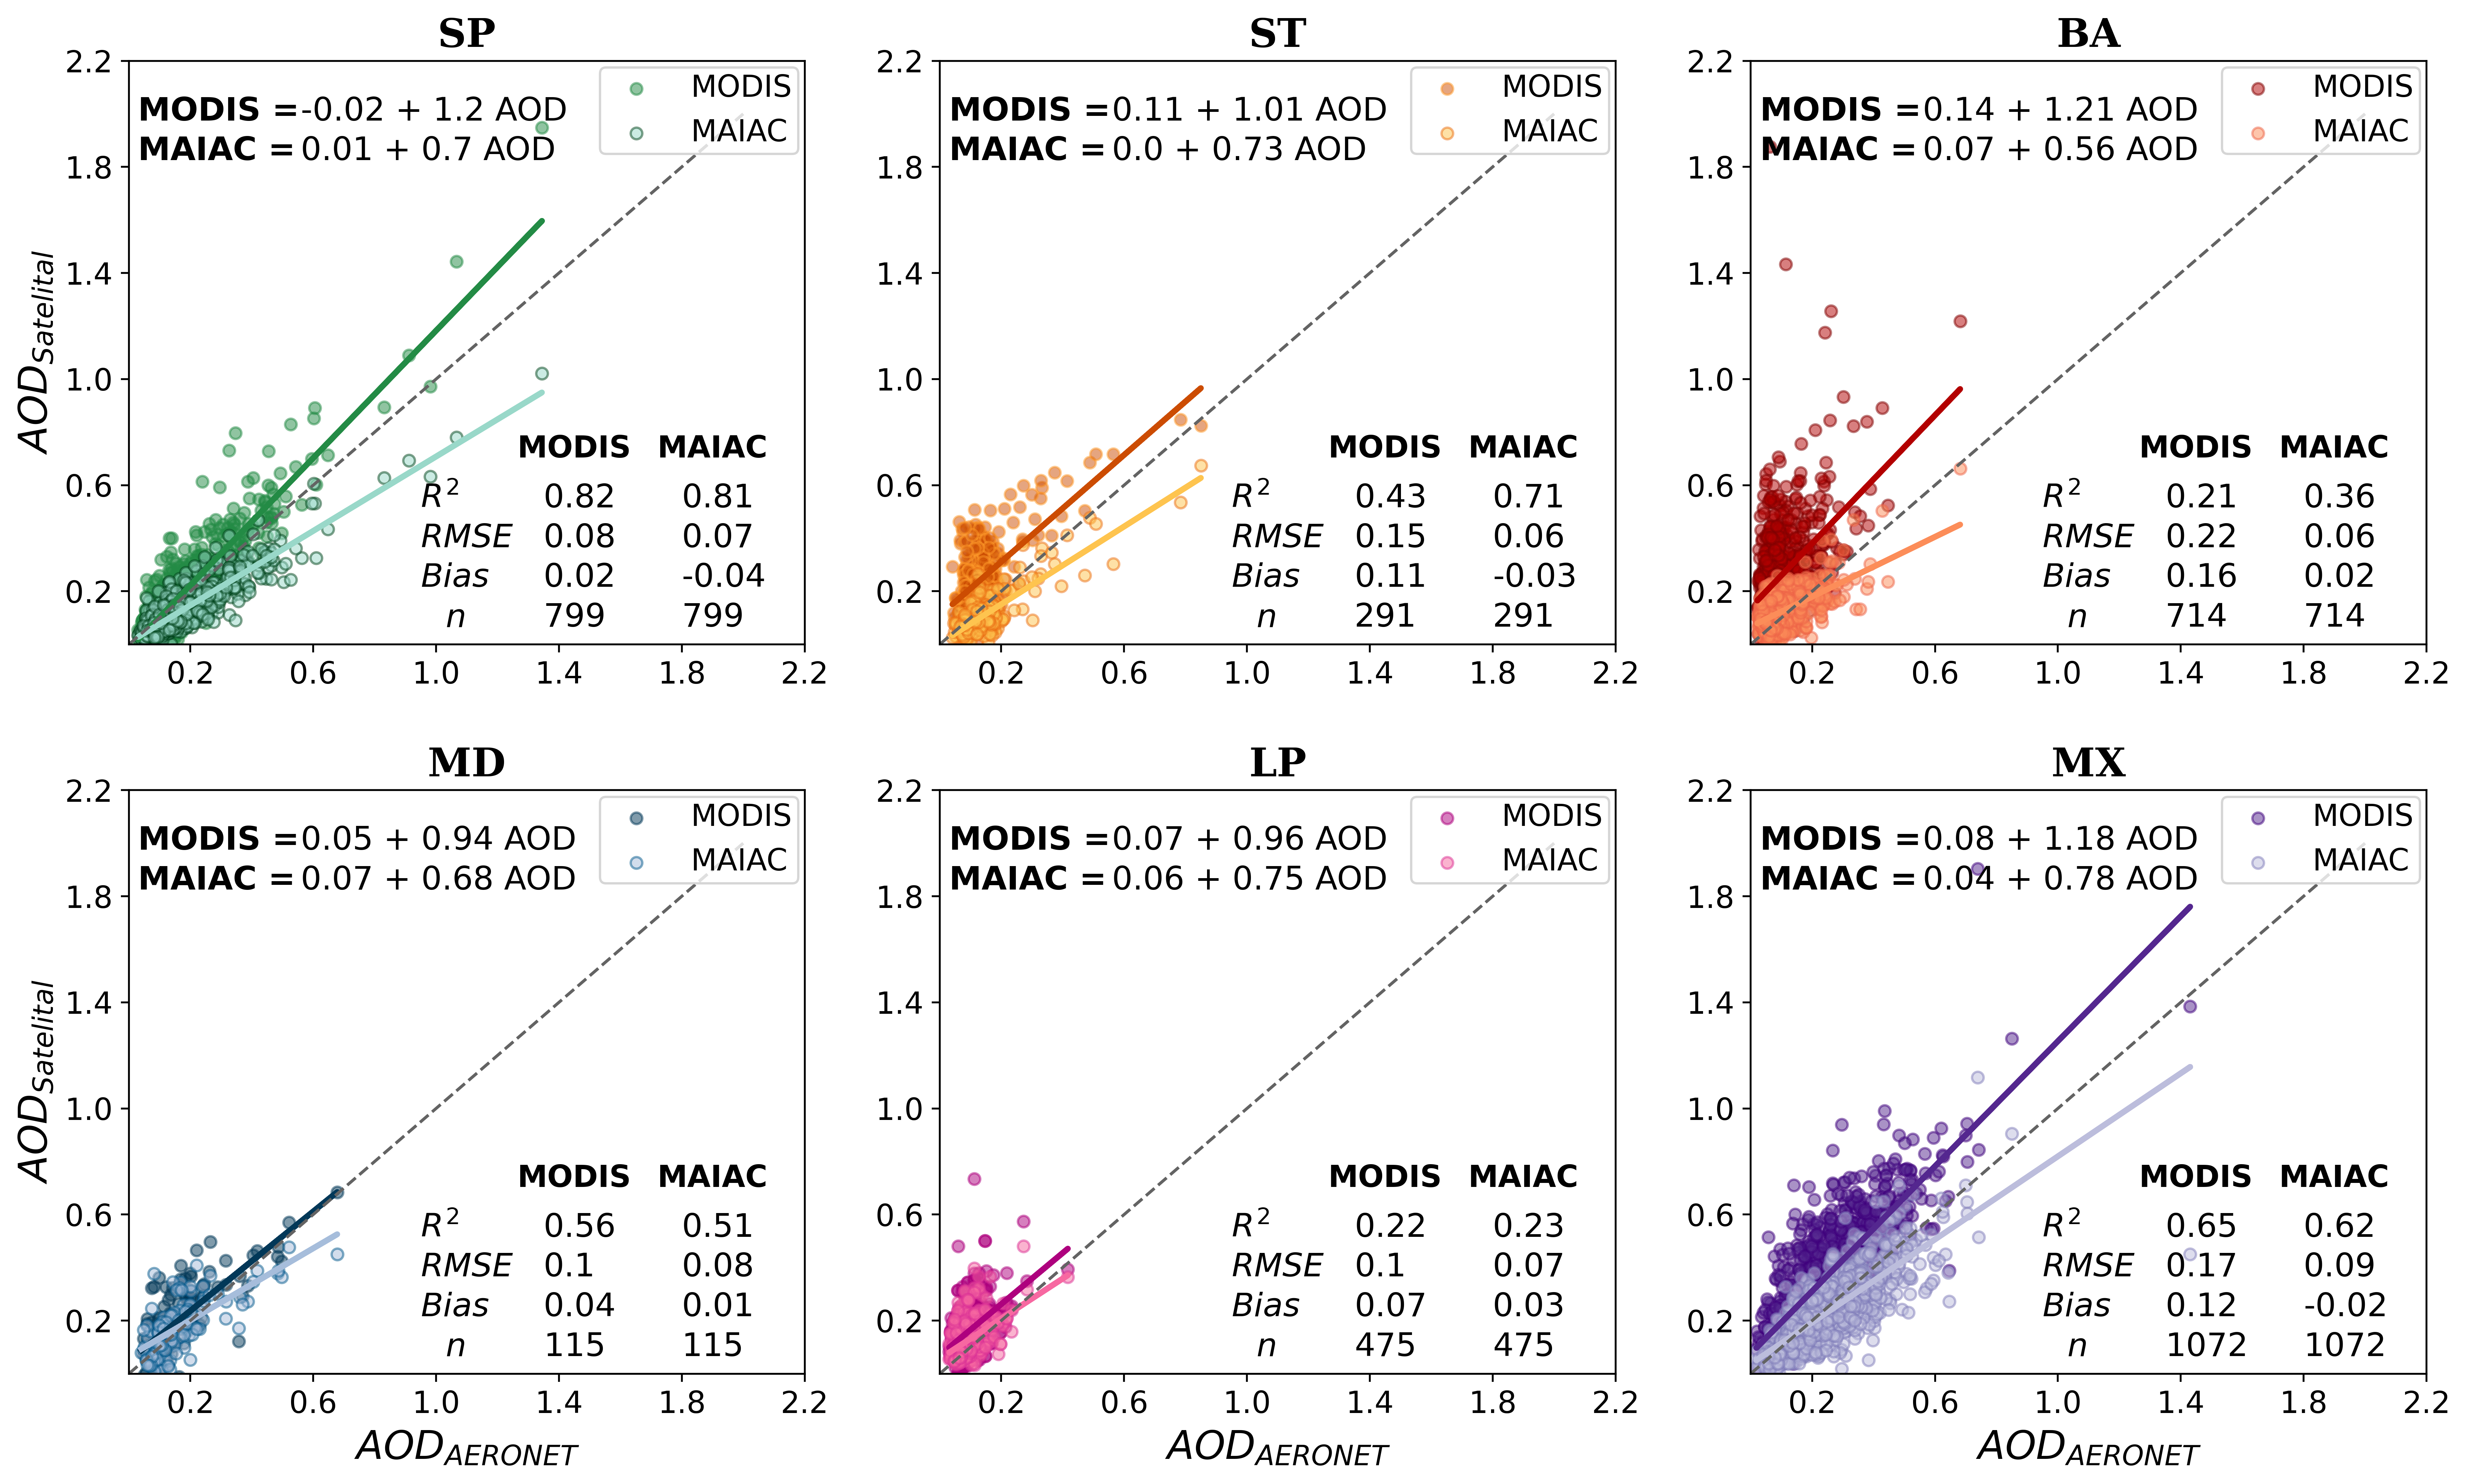

In [7]:
# Regrsion lineal C6
#date_format='%d/%m/%Y'
date_format='%d/%m/%Y'
nrows=2
ncols=3
plot='not'

edge_color_maiac_60 =["#238b45","#fe9929","#7f0000","#023858","#ae017e","#3f007d"]#######
color_maiac_60 = ["#238b45","#cc4c02","#b30000","#023858","#ae017e","#54278f"]#########"

edge_color_maiac_61 = ["#00441b","#ec7014","#ef6548","#045a8d","#dd3497","#807dba"]
color_maiac_61 = ["#99d8c9","#fec44f","#fc8d59", "#a6bddb","#f768a1","#bcbddc"]

colors =["#99d8c9","#fa9fb5","#a6bddb","#756bb1","#fec44f","#fc9272"]
#resolucion_espaciotemporal = "Collection 60min-1km  USA"
resolucion_espaciotemporal = ""
dir_path_latam ="D:/Josefina/paper_git/paper_maiac/datasets/V03/processed/merge_AER-MAIAC-MODIS//Latam/dia/3KM/60mins/"
regresion = linear_regression_plot (resolucion_espaciotemporal = resolucion_espaciotemporal, path=dir_path_latam,date_format=date_format,nrows=nrows,ncols=ncols,plot=plot,color_maiac_61=color_maiac_61,color_maiac_60=color_maiac_60,edge_color_maiac_60=edge_color_maiac_60,edge_color_maiac_61=edge_color_maiac_61)


## REU MAIAC vs MODIS

69.01 76.24
72.27 193.13
98.21 409.9
75.29 100.45
131.8 202.26
58.07 116.94


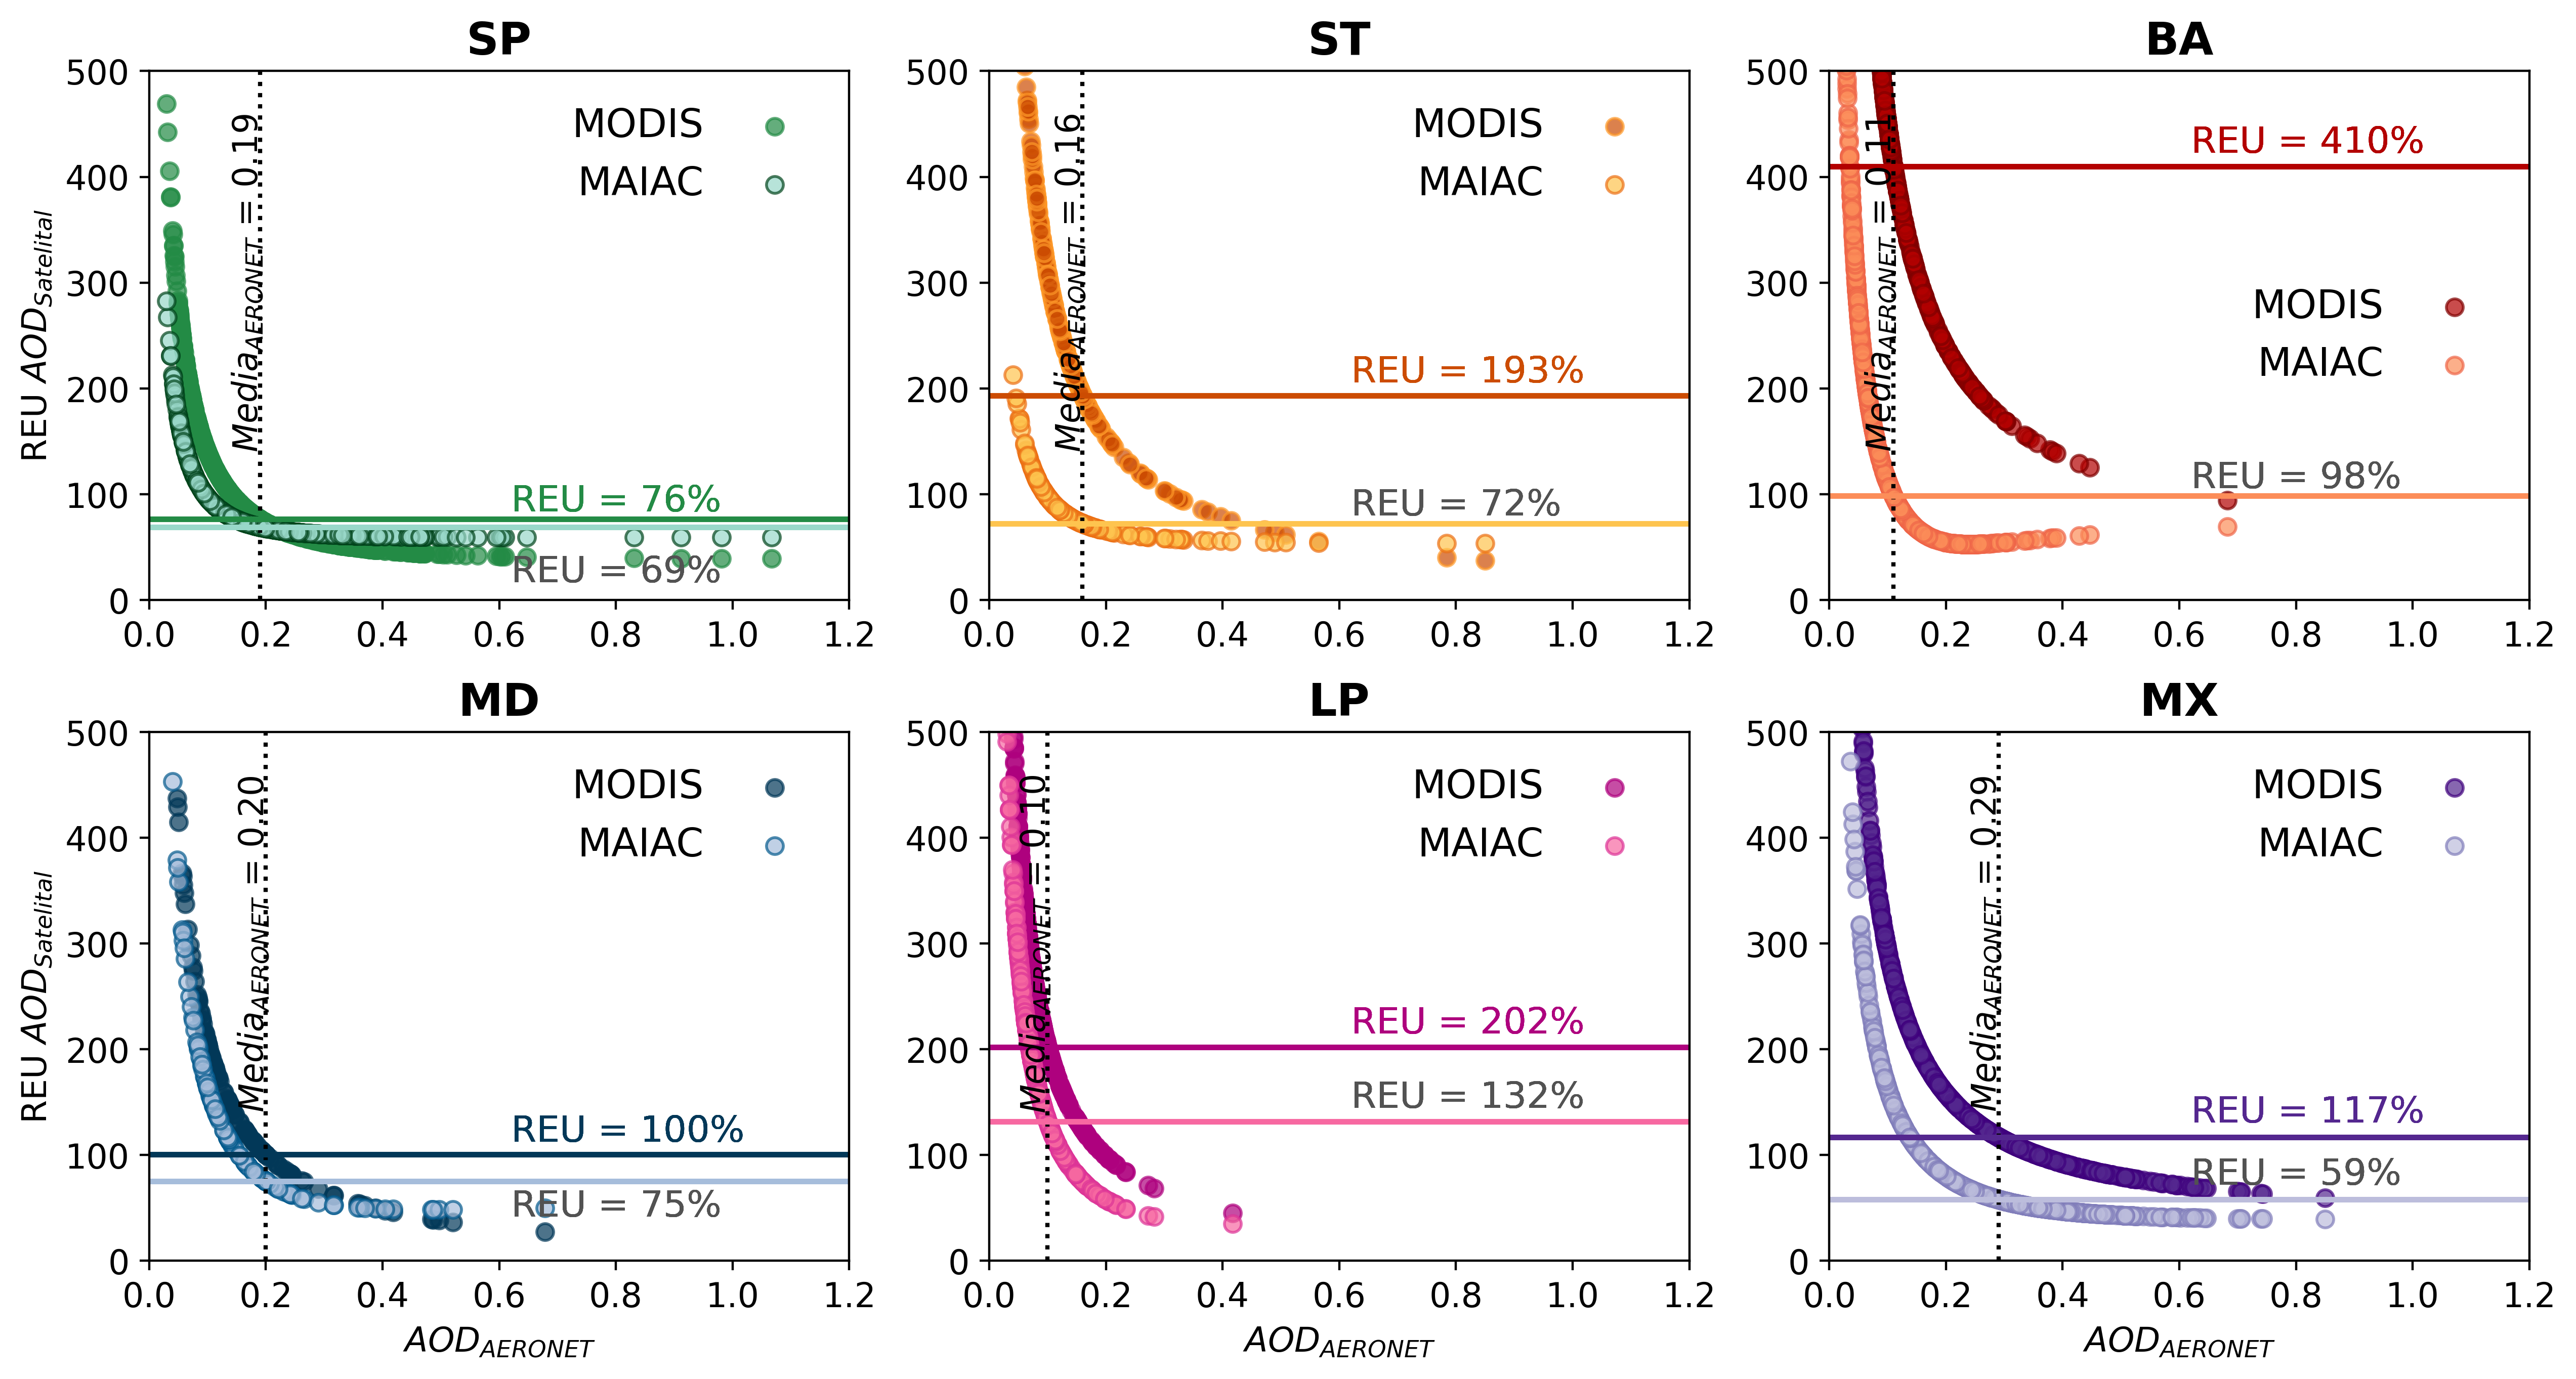

In [6]:
def REU_list(DF,Lambda = 1, u_xi = 0.0):

    #DF = data
    Lambda = 1
    u_xi = 0.0
    Sigma_err_x = u_xi
    # These are lists where I will save the different results
    list_u_1 = []
    list_reu_1 = []
    list_bias_1 = []
    list_noise_1 = []
    list_reux_1 = []
    list_biasx_1 = []
    list_noisex_1 = []
    ##
    list_u_3 = []
    list_reu_3 = []
    list_bias_3 = []
    list_noise_3 = []
    list_reux_3 = []
    list_biasx_3 = []
    list_noisex_3 = []
    list_verificacion_3 = []
 
    
    
    x_1 = DF['AOD_550_AER_mean'] #AERONET
    y_1 = DF["AOD_modis"] # Pollutant
    ##
    x_3 = DF['AOD_550_AER_mean'] #AERONET
    y_3 = DF["AOD_maiac_61"] # Pollutant
    
    #Masking the NaN's
    mask_1 = ~np.isnan(x_1) & ~np.isnan(y_1)
    x_1 = x_1[mask_1]
    y_1 = y_1[mask_1]
    n_1 = len(x_1)
    ##
    mask_3 = ~np.isnan(x_3) & ~np.isnan(y_3)
    x_3 = x_3[mask_3]
    y_3 = y_3[mask_3]
    n_3 = len(x_3)
    ##
    #Slope & Intercept usando REGRESION LINEAL (LR)
    slope_1, intercept_1, r_1, p_1, stderr_1 = scipy.stats.linregress(x_1[mask_1], y_1[mask_1])
    b1_1 = slope_1
    b0_1 = intercept_1
    #Slope & Intercept usando REGRESION LINEAL (LR)
    slope_3, intercept_3, r_3, p_3, stderr_3 = scipy.stats.linregress(x_3[mask_3], y_3[mask_3])
    b1_3 = slope_3
    b0_3 = intercept_3
    #Equation error variance for y = b0 + b1*x + v_i
    rss_1 = (y_1 - b0_1 - b1_1*x_1)**2
    RSS_1 = rss_1.values.sum()
    Sigma_v_sqr_1 = RSS_1/(n_1-2)
    #Equation error variance for y = b0 + b1*x + v_i
    rss_3 = (y_3 - b0_3 - b1_3*x_3)**2
    RSS_3 = rss_3.values.sum()
    Sigma_v_sqr_3 = RSS_3/(n_3-2)

    #Error variance due to the deviation of the 1:1 line
    ec_1 = (b0_1 + (b1_1 - 1)*x_1)**2
    ran_1 = Sigma_v_sqr_1 - Sigma_err_x**2
    #Error variance due to the deviation of the 1:1 line
    ec_3 = (b0_3 + (b1_3 - 1)*x_3)**2
    ran_3 = Sigma_v_sqr_3 - Sigma_err_x**2
    #Error variance due to the deviation of the 1:1 line

    #Results
    U_1 = ((ran_1  + ec_1 )**(1/2))
    REU_1  = ((2*100)/y_1 )*U_1 
    bias_1  = ((((2*100)/y_1 )**2)*ec_1 )**(1/2)
    noise_1  = ((((2*100)/y_1 )**2)*ran_1 )**(1/2)
    verificacion_1  = ((bias_1 **2 + noise_1 **2)**(1/2))
    verificacion_u_1  = ((bias_1 **2 + noise_1 **2)**(1/2))/((2*100)/y_1 )
    REUx_1  = 2*U_1 *100/x_1 
    biasx_1  = ((((2*100)/x_1 )**2)*ec_1 )**(1/2)
    noisex_1  = ((((2*100)/x_1 )**2)*ran_1 )**(1/2)
    #Results
    U_3 = ((ran_3  + ec_3)**(1/2))
    REU_3  = ((2*100)/y_3)*U_3 
    bias_3  = ((((2*100)/y_3)**2)*ec_3)**(1/2)
    noise_3  = ((((2*100)/y_3)**2)*ran_3)**(1/2)
    verificacion_3  = ((bias_3 **2 + noise_3 **2)**(1/2))
    verificacion_u_3  = ((bias_3 **2 + noise_3 **2)**(1/2))/((2*100)/y_3)
    REUx_3  = 2*U_3 *100/x_3
    biasx_3  = ((((2*100)/x_3 )**2)*ec_3 )**(1/2)
    noisex_3  = ((((2*100)/x_3 )**2)*ran_3 )**(1/2)


    #The results are each placed in a separate list
    list_u_1.append(U_1)
    list_reu_1.append(REU_1)
    list_bias_1.append(bias_1)
    list_noise_1.append(noise_1)
    #list_verificacion_1.append(verificacion_1)
    list_reux_1.append(REUx_1)
    list_biasx_1.append(biasx_1)
    list_noisex_1.append(noisex_1)
    #The results are each placed in a separate list
    list_u_3.append(U_3)
    list_reu_3.append(REU_3)
    list_bias_3.append(bias_3)
    list_noise_3.append(noise_3)
    list_verificacion_3.append(verificacion_3)
    list_reux_3.append(REUx_3)
    list_biasx_3.append(biasx_3)
    list_noisex_3.append(noisex_3)


    # The generated lists are concatenated
    U_1 = pd.concat(list_u_1, axis=1)
    REU_1 = pd.concat(list_reu_1, axis=1)
    REUx_1 = pd.concat(list_reux_1, axis=1)

    REU_3 = pd.concat(list_reu_3, axis=1)
    REUx_3 = pd.concat(list_reux_3, axis=1)
    # Realizar el merge de las tres columnas en un solo DataFrame
    
    
    result = pd.concat([DF['AOD_550_AER_mean'], REUx_1,DF['AOD_550_AER_mean'], REUx_3], axis=1)
    # Cambiar los nombres de las columnas
    result.columns = ["AOD_550_AER_mean", 'REUx_modis',"AOD_550_AER_mean2", 'REUx_maiac']

    # # Mostrar el resultado
    # result.tail(10)
    df_REUxy = result
    # df_REUxy.columns
    return df_REUxy
###################################################################################################################
###################################################################################################################
def REU_plot(path, date_format, nrows, ncols, plot, resolucion_espaciotemporal, 
             color_maiac_60, edge_color_maiac_60, color_maiac_61, edge_color_maiac_61,
             x_vert=0.18):
    
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import os

    # Definir las medias específicas para cada estación
    station_media = {
        'sp': 0.19,
        'st': 0.16,
        'ba': 0.11,
        'md': 0.2,
        'lp': 0.1,
        'mx': 0.29
    }

#     fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(16, 10), dpi=300)
    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(12,6),dpi=400)
    fig.suptitle(resolucion_espaciotemporal, fontsize=22, fontweight='bold')

    for p, files in enumerate(os.listdir(path)):
        data = pd.read_csv(os.path.join(path, files))
        station_name = files[2:4]

        # Obtener la media correspondiente para la estación actual
        station_key = station_name.lower()
        x_vert = station_media.get(station_key, 0.18)  # Default a 0.18 si no se encuentra la estación

        df_REUxy = REU_list(DF=data, Lambda=1, u_xi=0.0)

        x_modis = df_REUxy["AOD_550_AER_mean"]
        y_modis = df_REUxy["REUx_modis"]
        x_maiac = df_REUxy["AOD_550_AER_mean"]
        y_maiac = df_REUxy["REUx_maiac"]

        # Filtrar NaNs
        mask_modis = ~np.isnan(x_modis) & ~np.isnan(y_modis)
        mask_maiac = ~np.isnan(x_maiac) & ~np.isnan(y_maiac)

        x_modis = x_modis[mask_modis]
        y_modis = y_modis[mask_modis]
        x_maiac = x_maiac[mask_maiac]
        y_maiac = y_maiac[mask_maiac]

        # Encontrar valores de REUx donde x = x_vert
        idx_closest_modis = (np.abs(x_modis - x_vert)).idxmin()
        y_horiz_modis = y_modis.loc[idx_closest_modis]

        idx_closest_maiac = (np.abs(x_maiac - x_vert)).idxmin()
        y_horiz_maiac = y_maiac.loc[idx_closest_maiac]

        row = p // ncols
        col = p % ncols

        ax[row, col].scatter(x_modis, y_modis, color=color_maiac_60[p],
                             edgecolor=edge_color_maiac_60[p], alpha=0.7, label='MODIS')
        ax[row, col].scatter(x_maiac, y_maiac, color=color_maiac_61[p],
                             edgecolor=edge_color_maiac_61[p], alpha=0.7, label='MAIAC')

        # Líneas de referencia para las estaciones
        ax[row, col].axvline(x=x_vert, color='k', linestyle=':', lw=1.5)
        
        # Añadir línea vertical y texto para cada estación según su media
        #ax[row, col].vlines(x=x_vert, ymin=0, ymax=300, color=color_maiac_61[p], linewidth=1, alpha=0.8, linestyle='-')
        ax[row, col].text(x_vert-0.05, 300, rf'$Media_{{AERONET}}$ = {x_vert:.2f}', rotation=90, va='center', size=12)

#         ax[row, col].text(x_vert-0.05, 300, f"AER mean = {x_vert:.2f}", rotation=90, va='center', size=13)
        ax[row, col].axhline(y=y_horiz_modis, color=color_maiac_60[p],  lw=2)#linestyle=':',
        ax[row, col].axhline(y=y_horiz_maiac, color=color_maiac_61[p], lw=2)#linestyle='-.'
        print(round(y_horiz_maiac,2),round(y_horiz_modis,2))
        ax[0, 0].text(x=0.62, y=77,s=f"REU = 76%", color=color_maiac_60[0],fontsize=13, verticalalignment='bottom')
        ax[0, 1].text(x=0.62, y=194 + 5,s=f"REU = 193%", color=color_maiac_60[1],fontsize=13, verticalalignment='bottom')
        ax[0, 2].text(x=0.62, y=411 + 5,s=f"REU = 410%", color=color_maiac_60[2],fontsize=13, verticalalignment='bottom')
        ax[1, 0].text(x=0.62, y=101 + 5,s=f"REU = 100%", color=color_maiac_60[3],fontsize=13, verticalalignment='bottom')
        ax[1, 1].text(x=0.62, y=203 + 5,s=f"REU = 202%", color=color_maiac_60[4],fontsize=13, verticalalignment='bottom')
        ax[1, 2].text(x=0.62, y=119 + 5,s=f"REU = 117%", color=color_maiac_60[5],fontsize=13, verticalalignment='bottom')

        
        #color_maiac_61[1]
        ax[0, 0].text(x=0.62, y=10, s=f"REU = 69%", color="#525252",fontsize=13, verticalalignment='bottom')
        ax[0, 1].text(x=0.62, y=73, s=f"REU = 72%", color="#525252",fontsize=13, verticalalignment='bottom')
        ax[0, 2].text(x=0.62, y=99, s=f"REU = 98%", color="#525252",fontsize=13, verticalalignment='bottom')
        ax[1, 0].text(x=0.62, y=35, s=f"REU = 75%", color="#525252",fontsize=13, verticalalignment='bottom')
        ax[1, 1].text(x=0.62, y=133+5, s=f"REU = 132%", color="#525252",fontsize=13, verticalalignment='bottom')
        ax[1, 2].text(x=0.62, y=60  + 5, s=f"REU = 59%", color="#525252",fontsize=13, verticalalignment='bottom')
  
        # Mostrar los valores de los cortes sin convertir a porcentaje
#         ax[row, col].text(x=0.5, y=y_horiz_modis + 5,
#                           s=f"REUx = {y_horiz_modis:.2f}%", color=color_maiac_60[p],
#                           fontsize=14, verticalalignment='bottom')

#         ax[row, col].text(x=0.5, y=y_horiz_maiac + 5,
#                           s=f"REUx ={y_horiz_maiac:.2f}%", color=color_maiac_61[p],
#                           fontsize=14, verticalalignment='bottom')
        
# 67.57 79.97
# 74.51 193.02
# 97.84 415.49
# 76.86 101.33
# 166.93 251.51
# 53.90 128.00
                
                # Formato del gráfico
        ax[row, col].set_xlim(0, 1.2)
        ax[row, col].set_ylim(0, 500)
        ax[row, col].set_title(f'{station_name}', fontsize=16, fontweight='bold')
        ax[row, col].tick_params(axis='both', labelsize=12)
        ax[row, col].grid(False)
        ax[row, col].legend(frameon=False, markerfirst=False, fontsize=14)
        ax[0, 0].set_ylabel(r'REU $AOD_{Satelital}$',size=12)
        ax[0, 1].set_ylabel(r'',size=14)
        ax[0, 2].set_ylabel(r'',size=14)
        ax[1, 0].set_ylabel(r'REU $AOD_{Satelital}$',size=12)
        ax[1, 1].set_ylabel(r'',size=14)
        ax[1, 2].set_ylabel(r'',size=14)
        
        ax[0, 0].set_xlabel(r'',size=14)
        ax[0, 1].set_xlabel(r'',size=14)
        ax[0, 1].set_xlabel(r'',size=14)
        ax[1, 0].set_xlabel(r'$AOD_{AERONET}$',size=12)
        ax[1, 1].set_xlabel(r'$AOD_{AERONET}$',size=12)
        ax[1, 2].set_xlabel(r'$AOD_{AERONET}$',size=12)
#         ax[row, col].set_ylabel(r'REU $AOD_{Satellite}$',size=10)
        # Mostrar leyenda solo en (0, 0)
#         if row == 0 and col == 0:
#             ax[row, col].legend(fontsize=11, loc='upper right')

        # Etiquetas de ejes
#         if col == 0:
#             ax[row, col].set_ylabel('REUx (%)', fontsize=13)
#         if row == nrows - 1:
#             ax[row, col].set_xlabel('AOD AERONET', fontsize=13)


#     ax[0, 0].text(x=0.5, y=67.57 - 5,
#                       s=f"REUx = 67.57%", color=color_maiac_61[0],
#                       fontsize=14, verticalalignment='bottom')
#     ax[0, 0].text(x=0.5, y=67.57 + 5,
#                       s=f"       ", color=color_maiac_61[0],
#                       fontsize=14, verticalalignment='bottom')
        plt.subplots_adjust(left=0.01,#0.125,
                            bottom=0.01,#0.1, 
                            right=0.99,#0.9, 
                            top=0.99,#0.9, 
                            wspace=0.2, 
                            hspace=0.25)#0.4)
    plt.show()



#"REUx 30min - Dia - C61 - Latam"
date_format='%Y-%m-%d'
nrows=2
ncols=3
plot ="no"
edge_color_maiac_60 =["#238b45","#fe9929","#7f0000","#023858","#ae017e","#3f007d"]#######
color_maiac_60 = ["#238b45","#cc4c02","#b30000","#023858","#ae017e","#54278f"]#########"

edge_color_maiac_61 = ["#00441b","#ec7014","#ef6548","#045a8d","#dd3497","#807dba"]
color_maiac_61 = ["#99d8c9","#fec44f","#fc8d59", "#a6bddb","#f768a1","#bcbddc"]

dir_path_latam ="D:/Josefina/paper_git/paper_maiac/datasets/V03/processed/merge_AER-MAIAC-MODIS//Latam/dia/3KM/60mins/"


resolucion_espaciotemporal_30 = "  "
prueba_reu_plot = REU_plot(path=dir_path_latam,resolucion_espaciotemporal=resolucion_espaciotemporal_30, date_format=date_format,nrows=nrows,ncols=ncols,plot=plot,color_maiac_60=color_maiac_60, edge_color_maiac_60=edge_color_maiac_60,color_maiac_61=color_maiac_61, edge_color_maiac_61=edge_color_maiac_61)
prueba_reu_plot

#### Fig. 5. Comparación de las métricas de desempeño (R², RMSE y Bias) de los productos MAIAC C6.1 y MODIS DT (3 km) frente a observaciones AERONET, en los sitios de LatAm. 

In [ ]:
#### MODIS

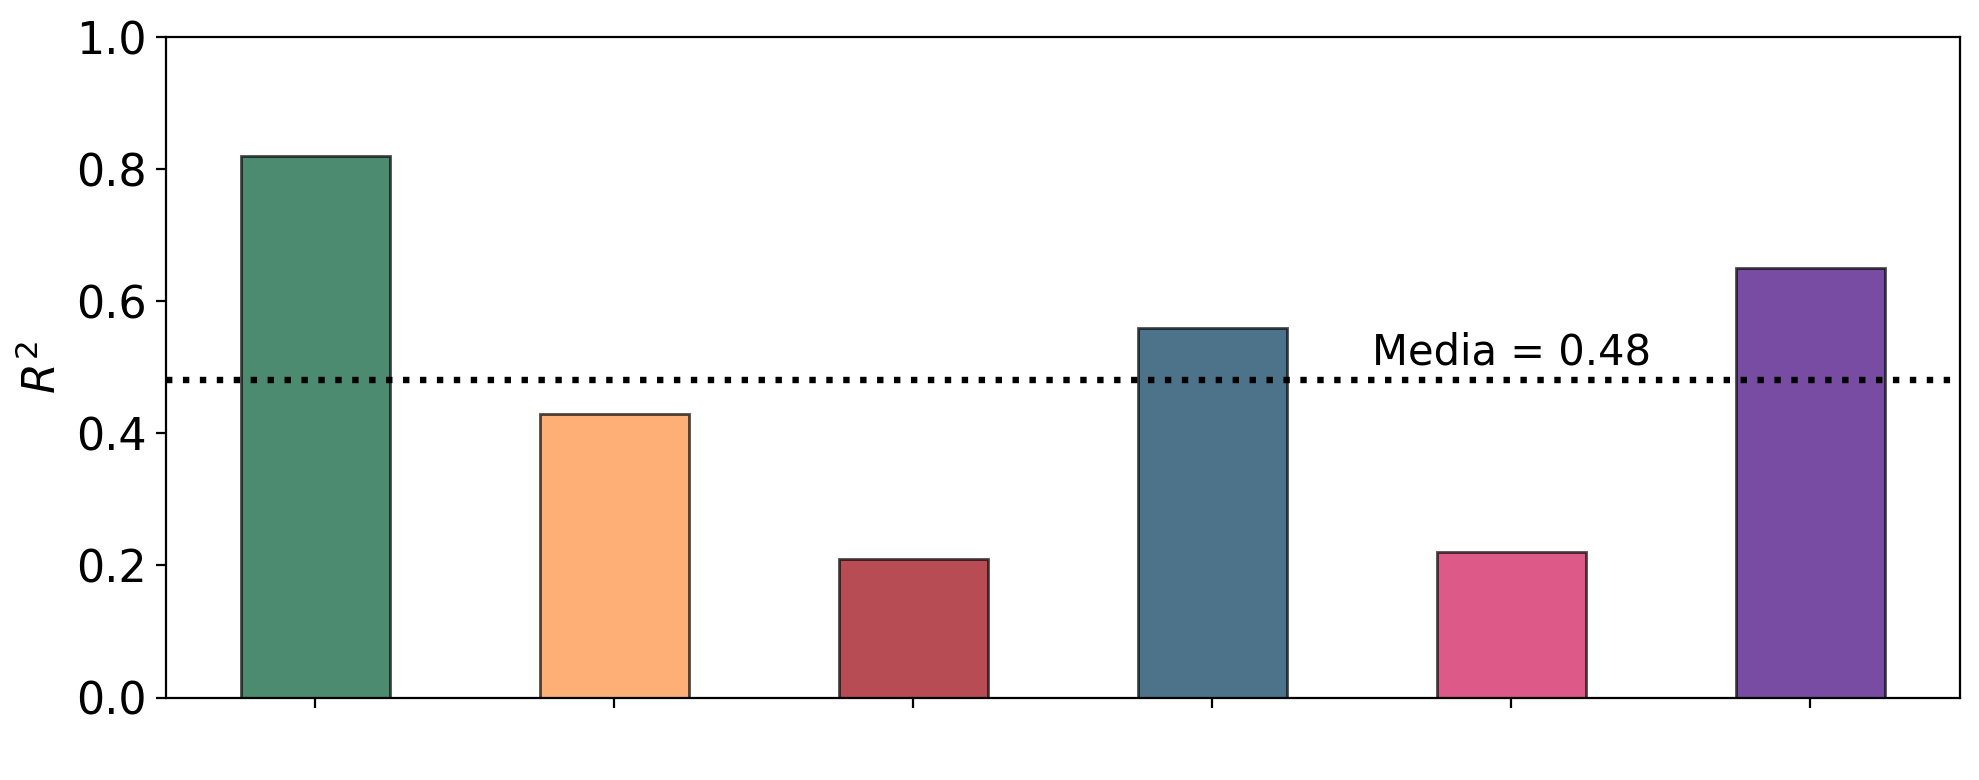

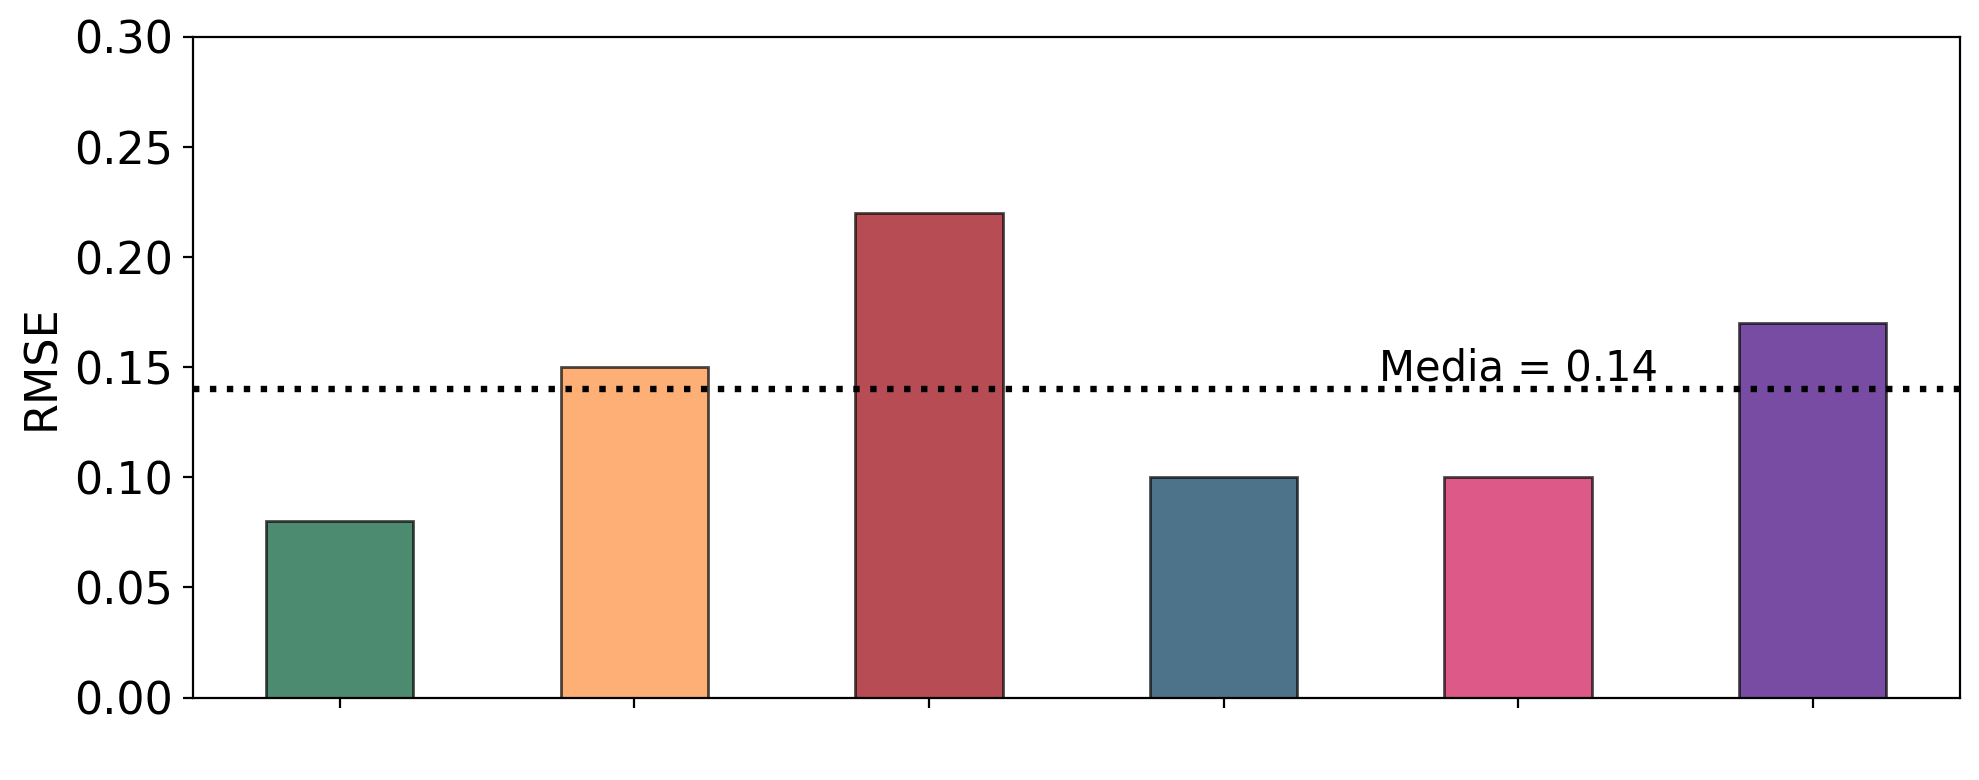

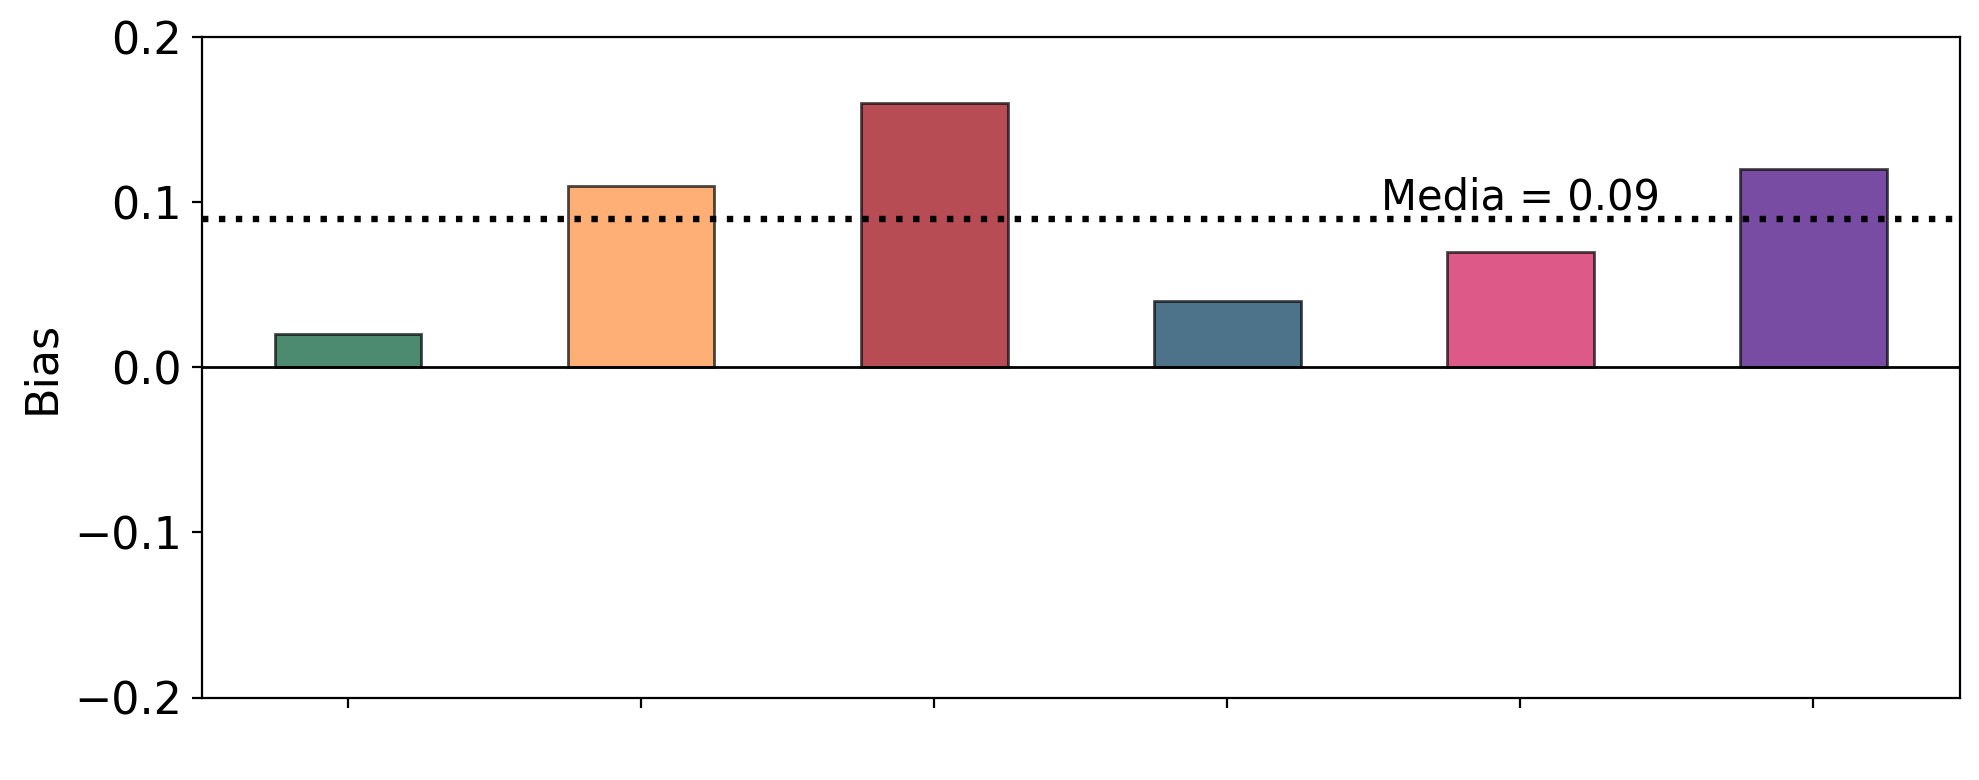

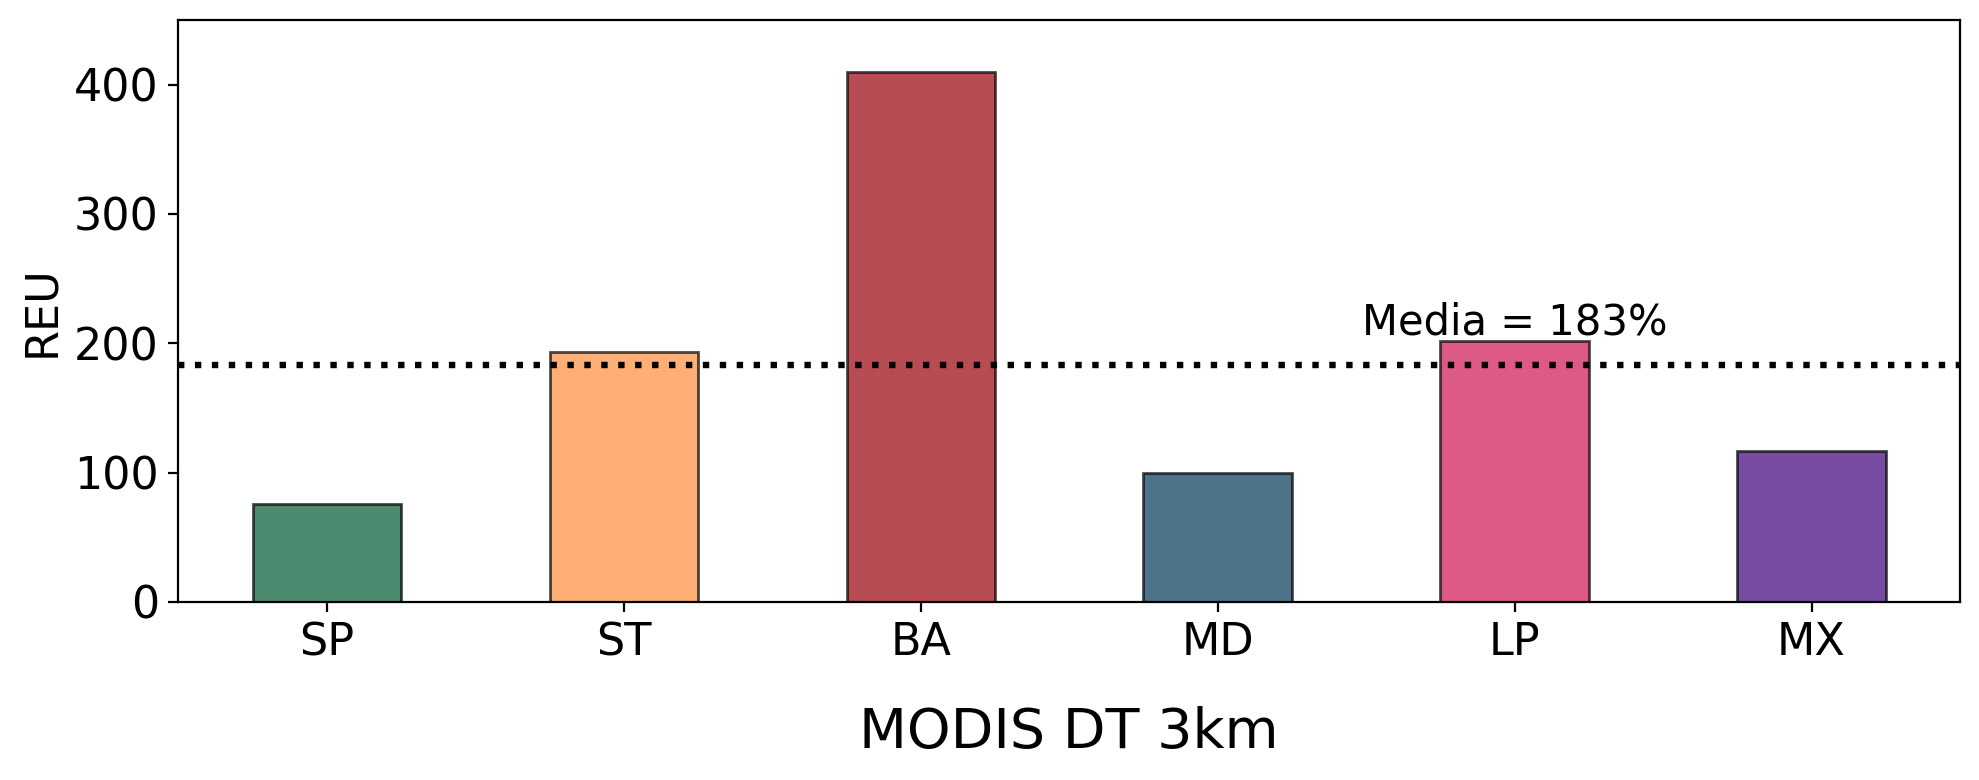

In [8]:
# Estaciones y colores
labels = ["SP", "ST", "BA", "MD", "LP", "MX"]
# colores = ["#2ca25f", "#dd1c77", "#2b8cbe", "#756bb1", "#fec44f", "#fc4e2a"]
colores = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
x = np.arange(len(labels))
labels_filtrados_blanco = [" ","","","", "",""]
# Valores para cada métrica
R2_MODIS = [0.82,0.43,0.21,0.56,0.22,0.65]
RMSE_MODIS= [0.08,0.15,0.22,0.1,0.1,0.17]
BIAS_MODIS= [0.02,0.11,0.16,0.04,0.07,0.12]
REU_MODIS= [76,193,410,100,202,117]

# Gráfico único: Media
fig, ax = plt.subplots(figsize=(10,4),dpi=200)

x = np.arange(len(labels))

# Barra de medias (ajustando el ancho de barra)
ax.bar(x, R2_MODIS, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=0.48, color="black", linewidth=2.3,  linestyle=':')
ax.text(len(x)-2, 0.49, 'Media = 0.48', ha='center', va='bottom', fontsize=15)
ax.set_ylabel(r'$R^{2}$', fontsize=16)
ax.set_ylim(0, 1)  # max(mean_vals) * 1.3)

# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels_filtrados_blanco, fontsize=16)  # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda (por defecto)
# ax.yaxis.tick_right()  # Elimina esta línea para que el eje Y esté en el lado izquierdo

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
ax.set_xlim(-0.5, len(labels) - 0.5)

plt.tight_layout()
plt.show()

###############

# Gráfico único: SD (desviación estándar)
fig, ax = plt.subplots(figsize=(10,4),dpi=200)

# Barra de medias (ajustando el ancho de barra)
ax.bar(x, RMSE_MODIS, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=0.14, color="black", linewidth=2.3, linestyle=':')
ax.text(len(x)-2, 0.14, 'Media = 0.14', ha='center', va='bottom', fontsize=15)
ax.set_ylabel("RMSE", fontsize=16)
ax.set_ylim(0, 0.30)  # max(mean_vals) * 1.3)

# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels_filtrados_blanco, fontsize=16)  # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda
# ax.yaxis.tick_right()  # Elimina esta línea

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
ax.set_xlim(-0.5, len(labels) - 0.5)

plt.tight_layout()
plt.show()

###############

# Gráfico único: % Missing Data
fig, ax = plt.subplots(figsize=(10,4),dpi=200)
# Barra de medias (ajustando el ancho de barra)
ax.bar(x, BIAS_MODIS, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=0.09, color="black", linewidth=2.3,  linestyle=':')
ax.axhline(y=0., color="black", linewidth=1)
ax.text(len(x)-2, 0.09, 'Media = 0.09', ha='center', va='bottom', fontsize=15)
ax.set_ylabel("Bias", fontsize=16)
ax.set_ylim(-0.2, 0.2)  # max(mean_vals) * 1.3)
# ax.set_xlabel("MODIS DT 3km", fontsize=20, labelpad=15)
# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels_filtrados_blanco, fontsize=16)   # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda
# ax.yaxis.tick_right()  # Elimina esta línea

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
ax.set_xlim(-0.5, len(labels) - 0.5)

plt.tight_layout()
plt.show()

###############

# Gráfico único: % Missing Data
fig, ax = plt.subplots(figsize=(10,4),dpi=200)
# Barra de medias (ajustando el ancho de barra)
ax.bar(x, REU_MODIS, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=183, color="black", linewidth=2.3,  linestyle=':')
ax.axhline(y=0., color="black", linewidth=1)
ax.text(len(x)-2, 200, 'Media = 183%', ha='center', va='bottom', fontsize=15)
ax.set_ylabel("REU", fontsize=16)
ax.set_ylim(0,450)  # max(mean_vals) * 1.3)
ax.set_xlabel("MODIS DT 3km", fontsize=20, labelpad=15)
# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)  # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda
# ax.yaxis.tick_right()  # Elimina esta línea

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
ax.set_xlim(-0.5, len(labels) - 0.5)

plt.tight_layout()
plt.show()

In [ ]:
### MAIAC

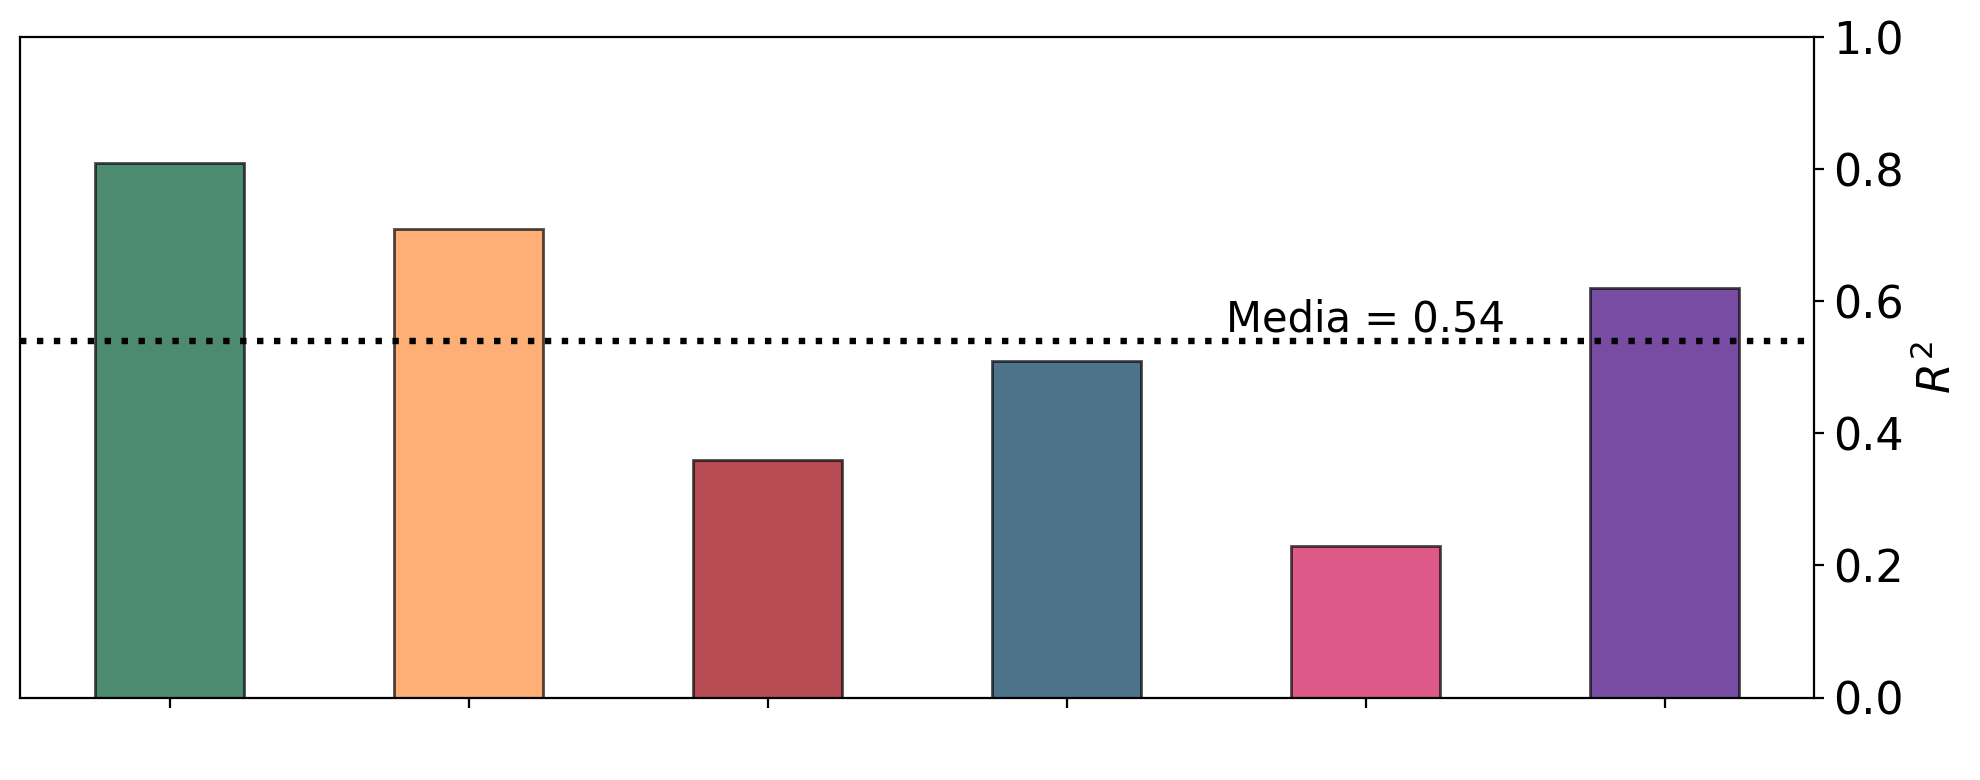

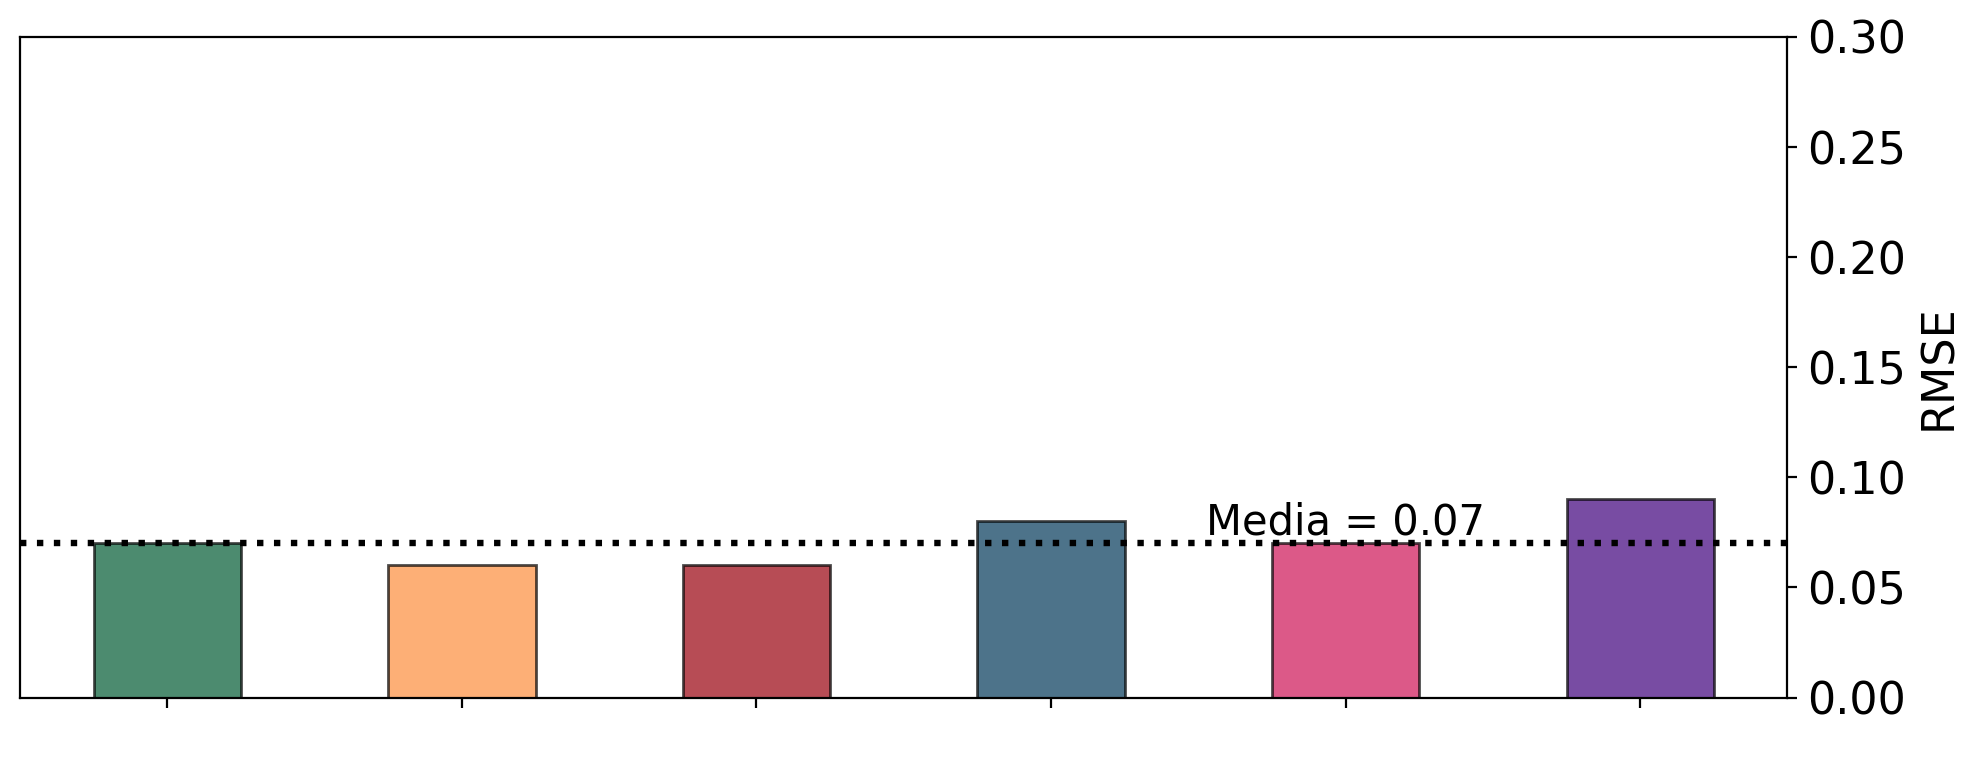

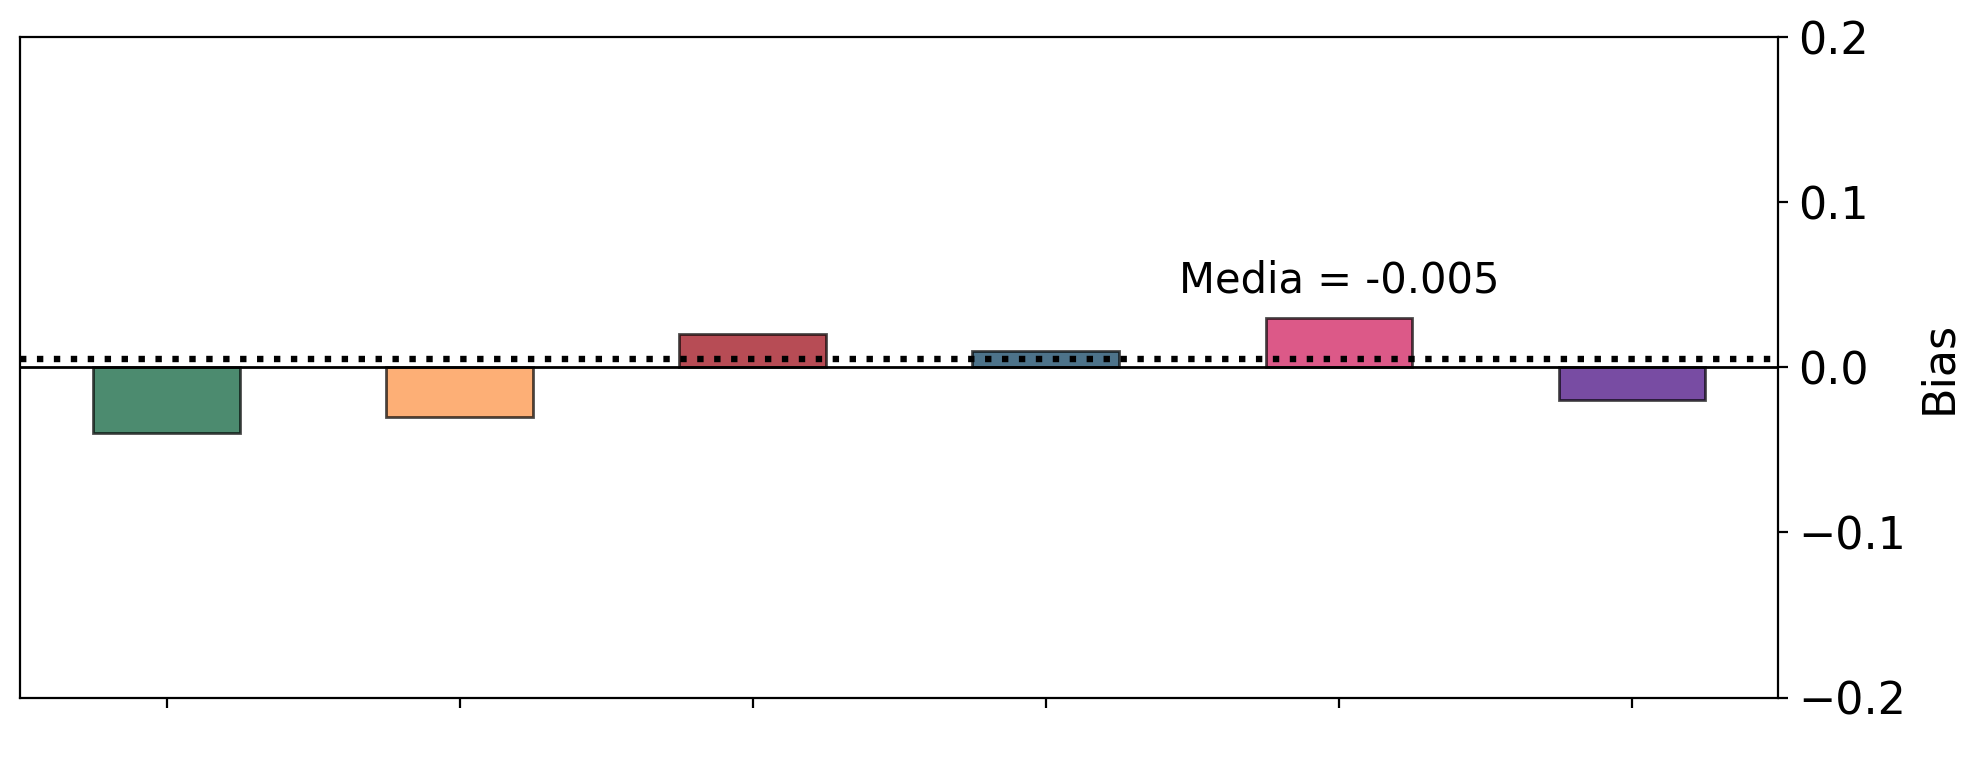

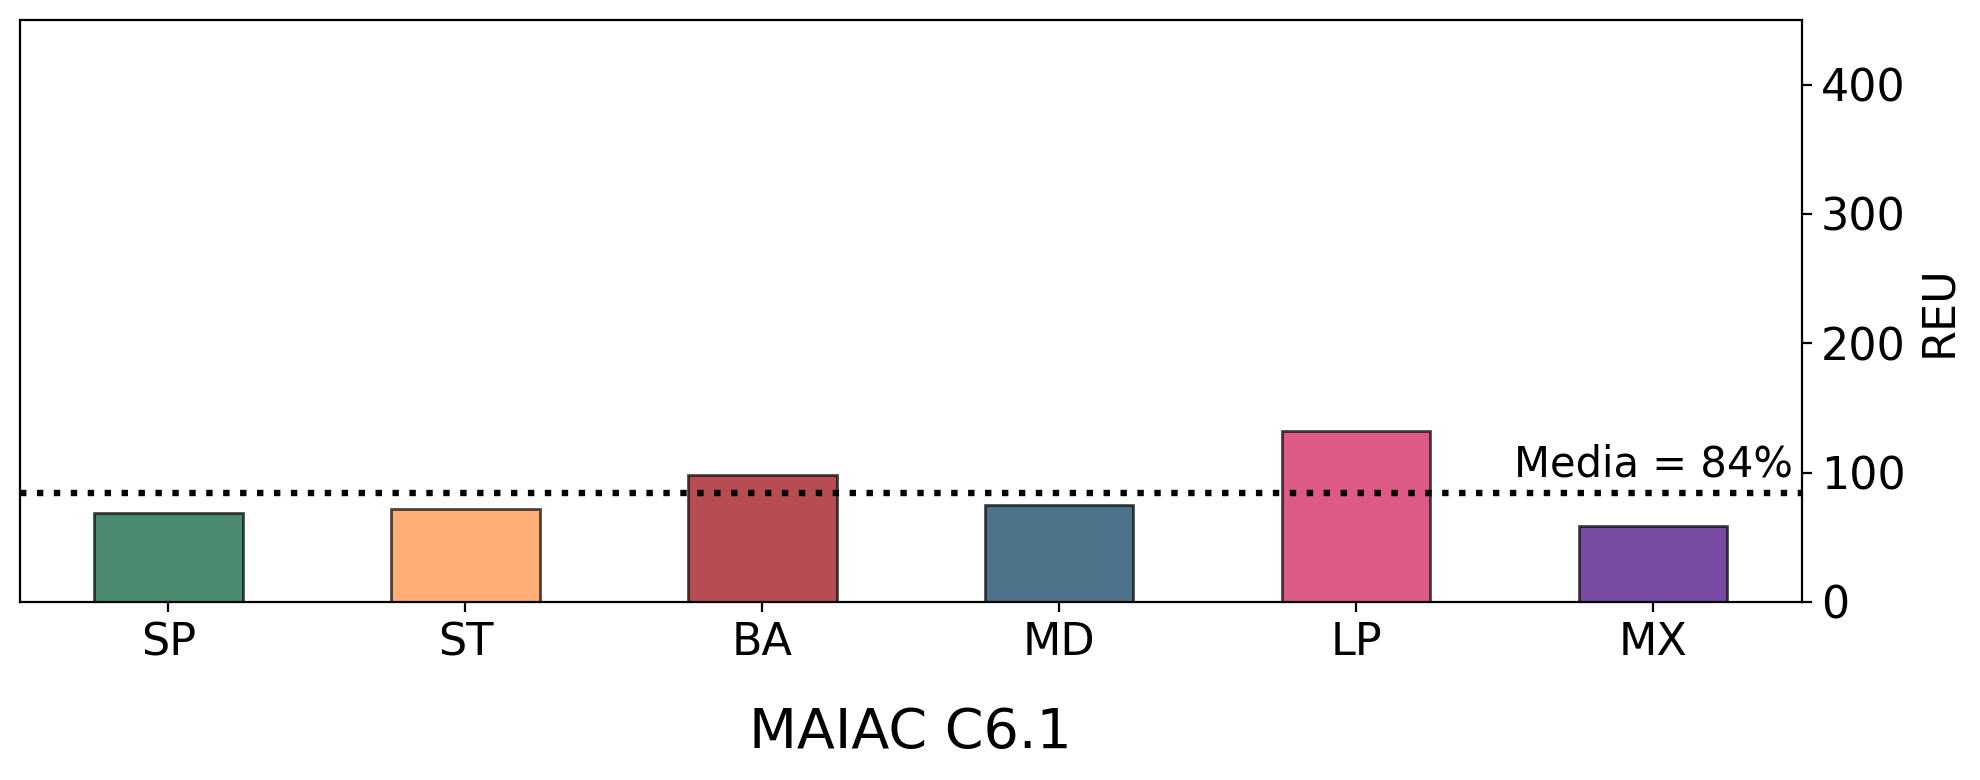

In [14]:
# Estaciones y colores
labels = ["SP", "ST", "BA", "MD", "LP", "MX"]
# colores = ["#2ca25f", "#dd1c77", "#2b8cbe", "#756bb1", "#fec44f", "#fc4e2a"]
colores = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"]
x = np.arange(len(labels))
labels_filtrados_blanco = [" ","","","", "",""]
# Valores para cada métrica

R2_MAIAC = [0.81,0.71,0.36,0.51,0.23,0.62]
RMSE_MAIAC= [0.07,0.06,0.06,0.08,0.07,0.09]
BIAS_MAIAC= [-0.04,-0.03,0.02,0.01,0.03,-0.02]
REU_MAIAC= [69,72,98,75,132,59]


# Gráfico único: Media
fig, ax = plt.subplots(figsize=(10,4),dpi=200)

# x = np.arange(len(labels))
# Barras más juntas

# Barra de medias (ajustando el ancho de barra)
ax.bar(x, R2_MAIAC, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=0.54, color="black", linewidth=2.3,  linestyle=':')
ax.text(len(x)-2, 0.54, 'Media = 0.54', ha='center', va='bottom', fontsize=15)
ax.set_ylabel(r'$R^{2}$', fontsize=16)
ax.set_ylim(0, 1)  # max(mean_vals) * 1.3)

# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels_filtrados_blanco, fontsize=16)  # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda (por defecto)
# ax.yaxis.tick_right()  # Elimina esta línea para que el eje Y esté en el lado izquierdo

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
ax.set_xlim(-0.5, len(labels) - 0.5)
# Eje Y a la derecha
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.tight_layout()
plt.show()

###############

# Gráfico único: SD (desviación estándar)
fig, ax = plt.subplots(figsize=(10,4),dpi=200)

# Barra de medias (ajustando el ancho de barra)
ax.bar(x, RMSE_MAIAC, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=0.07, color="black", linewidth=2.3,  linestyle=':')
ax.text(len(x)-2, 0.07, 'Media = 0.07', ha='center', va='bottom', fontsize=15)
ax.set_ylabel("RMSE", fontsize=16)
ax.set_ylim(0, 0.30)  # max(mean_vals) * 1.3)

# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels_filtrados_blanco, fontsize=16)  # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda
# ax.yaxis.tick_right()  # Elimina esta línea

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
ax.set_xlim(-0.5, len(labels) - 0.5)
# Eje Y a la derecha
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.tight_layout()
plt.show()

###############

# Gráfico único: % Missing Data
fig, ax = plt.subplots(figsize=(10,4),dpi=200)

# Barra de medias (ajustando el ancho de barra)
ax.bar(x, BIAS_MAIAC, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=0.005, color="black", linewidth=2.3,  linestyle=':')
ax.axhline(y=0., color="black", linewidth=1)
ax.text(len(x)-2, 0.04, 'Media = -0.005', ha='center', va='bottom', fontsize=15)
ax.set_ylabel("Bias", fontsize=16)
ax.set_ylim(-0.2, 0.2)  # max(mean_vals) * 1.3)
# ax.set_xlabel("MAIAC", fontsize=20, labelpad=15)
# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels_filtrados_blanco, fontsize=16)   # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda
# ax.yaxis.tick_right()  # Elimina esta línea

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
ax.set_xlim(-0.5, len(labels) - 0.5)
# Eje Y a la derecha
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

plt.tight_layout()
plt.show()

###############

# Gráfico único: % Missing Data
fig, ax = plt.subplots(figsize=(10,4),dpi=200)

# Barra de medias (ajustando el ancho de barra)
ax.bar(x, REU_MAIAC, color=colores, edgecolor='black', alpha=0.7, width=0.5)  # Ancho de barra más angosto
ax.axhline(y=84.16667, color="black", linewidth=2.3,  linestyle=':')
ax.text(len(x)-1, 90, 'Media = 84%', ha='center', va='bottom', fontsize=15)
ax.set_ylabel("REU", fontsize=16)
ax.set_ylim(0,450)  # max(mean_vals) * 1.3)
ax.set_xlabel("MAIAC C6.1", fontsize=20, labelpad=15)
# Etiquetas en el eje X (aumentando el tamaño de letra)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=16)  # Aumento del tamaño de letra de los ticks en el eje X

# Eje Y a la izquierda
# ax.yaxis.tick_right()  # Elimina esta línea

# Estética
ax.tick_params(axis='y', labelsize=16)
ax.grid(False)
ax.set_xlim(-0.5, len(labels) - 0.5)
# Eje Y a la derecha
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

plt.tight_layout()
plt.show()

### Boxplot Promedios por producto

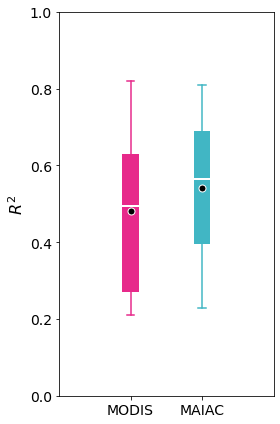

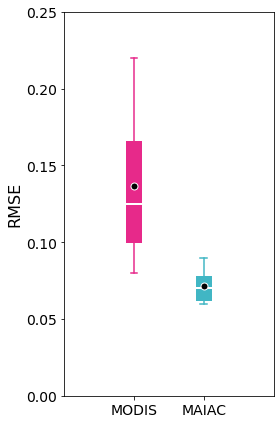

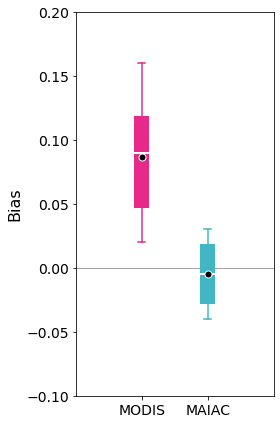

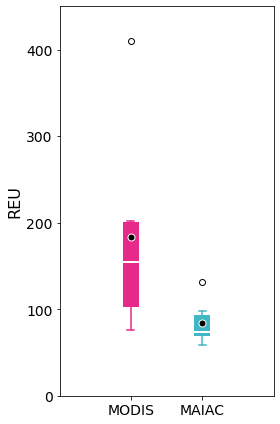

In [22]:
# Valores para cada métrica
R2_MAIAC = [0.81,0.71,0.36,0.51,0.23,0.62]
RMSE_MAIAC= [0.07,0.06,0.06,0.08,0.07,0.09]
BIAS_MAIAC= [-0.04,-0.03,0.02,0.01,0.03,-0.02]
REU_MAIAC= [69,72,98,75,132,59]

R2_MODIS = [0.82,0.43,0.21,0.56,0.22,0.65]
RMSE_MODIS= [0.08,0.15,0.22,0.1,0.1,0.17]
BIAS_MODIS= [0.02,0.11,0.16,0.04,0.07,0.12]
REU_MODIS= [76,193,410,100,202,117]
# Crear gráfico
fig, ax = plt.subplots(figsize=(4, 6))

# Crear boxplot con posiciones más cercanas
box = ax.boxplot([R2_MODIS, R2_MAIAC],
                 patch_artist=True,
                 positions=[1, 1.5],  # más cerca entre sí
                 widths=0.1,
                 showmeans=True,
                 meanprops=dict(marker='o', 
                                markerfacecolor='black', 
                                markeredgecolor='white', 
                                markersize=7))

# Colores
colores = ['#e7298a', '#41b6c4']

# Aplicar estilo
for i, color in enumerate(colores):
    box['boxes'][i].set(facecolor=color, edgecolor=color, linewidth=2)
    box['medians'][i].set(color='white', linewidth=2)
    box['whiskers'][i*2].set(color=color, linewidth=1.5)
    box['whiskers'][i*2+1].set(color=color, linewidth=1.5)
    box['caps'][i*2].set(color=color, linewidth=1.5)
    box['caps'][i*2+1].set(color=color, linewidth=1.5)

# Etiquetas personalizadas en X para cada boxplot
ax.set_xticks([1, 1.5])  # Posiciones de los boxplots
ax.set_xticklabels(['MODIS', 'MAIAC'], fontsize=16)  # Nombres de los boxplots

# Estética
ax.set_ylabel(r"$R^{2}$", fontsize=16)
ax.set_ylim(0, 1)
ax.tick_params(axis='both', labelsize=14)
ax.grid(False)
plt.tight_layout()
plt.show()
##############################################
# Crear gráfico rmse
fig, ax = plt.subplots(figsize=(4, 6))

# Crear boxplot con posiciones más cercanas
box = ax.boxplot([RMSE_MODIS, RMSE_MAIAC],
                 patch_artist=True,
                 positions=[1, 1.5],  # más cerca entre sí
                 widths=0.1,
                 showmeans=True,
                 meanprops=dict(marker='o', 
                                markerfacecolor='black', 
                                markeredgecolor='white', 
                                markersize=7))

# Colores
colores = ['#e7298a', '#41b6c4']

# Aplicar estilo
for i, color in enumerate(colores):
    box['boxes'][i].set(facecolor=color, edgecolor=color, linewidth=2)
    box['medians'][i].set(color='white', linewidth=2)
    box['whiskers'][i*2].set(color=color, linewidth=1.5)
    box['whiskers'][i*2+1].set(color=color, linewidth=1.5)
    box['caps'][i*2].set(color=color, linewidth=1.5)
    box['caps'][i*2+1].set(color=color, linewidth=1.5)

# Etiquetas personalizadas en X para cada boxplot
ax.set_xticks([1, 1.5])  # Posiciones de los boxplots
ax.set_xticklabels(['MODIS', 'MAIAC'], fontsize=16)  # Nombres de los boxplots

# Estética
ax.set_ylabel(r"RMSE", fontsize=16)
ax.set_ylim(0, 0.25)
ax.tick_params(axis='both', labelsize=14)
ax.grid(False)
plt.tight_layout()
plt.show()

##############################################
# Crear gráfico rmse
fig, ax = plt.subplots(figsize=(4, 6))
ax.axhline(y=0.0, color="black", linewidth=0.6, alpha=0.6, linestyle='-')
# Crear boxplot con posiciones más cercanas
box = ax.boxplot([BIAS_MODIS, BIAS_MAIAC],
                 patch_artist=True,
                 positions=[1, 1.5],  # más cerca entre sí
                 widths=0.1,
                 showmeans=True,
                 meanprops=dict(marker='o', 
                                markerfacecolor='black', 
                                markeredgecolor='white', 
                                markersize=7))

# Colores
colores = ['#e7298a', '#41b6c4']

# Aplicar estilo
for i, color in enumerate(colores):
    box['boxes'][i].set(facecolor=color, edgecolor=color, linewidth=2)
    box['medians'][i].set(color='white', linewidth=2)
    box['whiskers'][i*2].set(color=color, linewidth=1.5)
    box['whiskers'][i*2+1].set(color=color, linewidth=1.5)
    box['caps'][i*2].set(color=color, linewidth=1.5)
    box['caps'][i*2+1].set(color=color, linewidth=1.5)

# Etiquetas personalizadas en X para cada boxplot
ax.set_xticks([1, 1.5])  # Posiciones de los boxplots
ax.set_xticklabels(['MODIS', 'MAIAC'], fontsize=16)  # Nombres de los boxplots

# Estética
ax.set_ylabel(r"Bias", fontsize=16)
ax.set_ylim(-0.1, 0.2)
ax.tick_params(axis='both', labelsize=14)
ax.grid(False)
plt.tight_layout()
plt.show()


##############################################
##############################################
# Crear gráfico rmse
fig, ax = plt.subplots(figsize=(4, 6))
ax.axhline(y=0.0, color="black", linewidth=0.6, alpha=0.6, linestyle='-')
# Crear boxplot con posiciones más cercanas
box = ax.boxplot([REU_MODIS, REU_MAIAC],
                 patch_artist=True,
                 positions=[1, 1.5],  # más cerca entre sí
                 widths=0.1,
                 showmeans=True,
                 meanprops=dict(marker='o', 
                                markerfacecolor='black', 
                                markeredgecolor='white', 
                                markersize=7))

# Colores
colores = ['#e7298a', '#41b6c4']

# Aplicar estilo
for i, color in enumerate(colores):
    box['boxes'][i].set(facecolor=color, edgecolor=color, linewidth=2)
    box['medians'][i].set(color='white', linewidth=2)
    box['whiskers'][i*2].set(color=color, linewidth=1.5)
    box['whiskers'][i*2+1].set(color=color, linewidth=1.5)
    box['caps'][i*2].set(color=color, linewidth=1.5)
    box['caps'][i*2+1].set(color=color, linewidth=1.5)

# Etiquetas personalizadas en X para cada boxplot
ax.set_xticks([1, 1.5])  # Posiciones de los boxplots
ax.set_xticklabels(['MODIS', 'MAIAC'], fontsize=16)  # Nombres de los boxplots

# Estética
ax.set_ylabel(r"REU", fontsize=16)
ax.set_ylim(0, 450)
ax.yaxis.set_ticks(np.arange(0, 450, 100))
ax.tick_params(axis='both', labelsize=14)
ax.grid(False)
plt.tight_layout()
plt.show()